1. Create a program that computes the flow rate of a power-law fluid through an annulus given the pressure drop.  Re-create Table I from Hanks and Larsen (attached).  Use the following properties and process conditions for a demonstration:

$\sigma$ = 0.24, m = 150 Pas $^n$, R = 0.012m, L = 0.12m, and the pressure drop is 25 PSI.

Bonus - create an interactive dashboard.  Be creative about information useful in a dashboard.

![Integral_to_Solve](IntegralToSolve.png)

In [133]:
import scipy.integrate as integrate
from scipy.optimize import root
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as ipy
from IPython.display import display

nList = np.linspace(0.1,1.00,19)
sigmaList = [0.05,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
sList = 1/nList

lambdaVals = np.zeros((19,11))

for j in range(len(sigmaList)):
    for i in range(len(nList)):
        def findRoot(lamb,sig,s):
            def leftIntegrand(x,lamb,s):
                return (((lamb ** 2) / x) - x) ** s

            def rightIntegrand(x,lamb,s):
                return (x - (((lamb) ** 2) / x)) ** s
            
            return integrate.quad(leftIntegrand,sig,lamb,args=(lamb,s))[0] - integrate.quad(rightIntegrand,lamb,1,args=(lamb,s))[0]
        
        lambdaVals[i][j] = root(findRoot,0.9,args=(sigmaList[j],sList[i])).x[0]

Table1 = pd.DataFrame(lambdaVals)
Table1.columns = sigmaList
Table1.index = nList
Table1



,0.05,0.08,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90
0.10,0.253339,0.311824,0.344175,0.468652,0.563164,0.643077,0.714020,0.778754,0.838864,0.895353,0.948903
0.15,0.267526,0.325066,0.356674,0.477631,0.569413,0.647290,0.716727,0.780368,0.839715,0.895709,0.948987
0.20,0.281081,0.337397,0.368177,0.485620,0.574886,0.650946,0.719064,0.781758,0.840447,0.896015,0.949059
0.25,0.293918,0.348815,0.378720,0.492744,0.579707,0.654145,0.721100,0.782966,0.841081,0.896281,0.949122
0.30,0.305990,0.359345,0.388360,0.499115,0.583977,0.656964,0.722890,0.784025,0.841637,0.896513,0.949177
0.35,0.317281,0.369033,0.397169,0.504833,0.587781,0.659465,0.724473,0.784961,0.842128,0.896718,0.949225
0.40,0.327799,0.377936,0.405217,0.509984,0.591186,0.661698,0.725884,0.785794,0.842565,0.896900,0.949268
0.45,0.337571,0.386115,0.412576,0.514640,0.594251,0.663702,0.727149,0.786541,0.842956,0.897063,0.949307
0.50,0.346634,0.393631,0.419314,0.518865,0.597022,0.665510,0.728289,0.787213,0.843308,0.897210,0.949341
0.55,0.355031,0.400545,0.425494,0.522712,0.599538,0.667150,0.729322,0.787821,0.843627,0.897343,0.949373


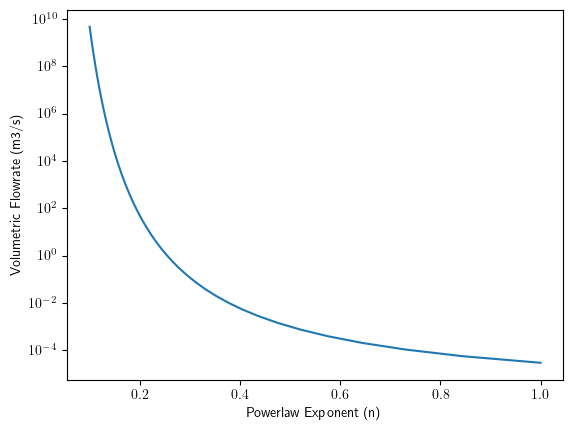

In [134]:
def computeFlowrate(R,m,sigma,P,L):
    s = np.linspace(1/0.1,1,50)
    flowRates = np.zeros(np.size(s))
    
    P = P *6894.76
    
    def flowIntegral(x,lamb,sigma,s):
        return (x ** (-s)) * (abs((lamb ** 2) - (x ** 2)) ** (s + 1))
    
    for i in range(len(s)):
        lamb = root(findRoot,0.9,args=(sigma,s[i])).x
        flowRates[i] = (np.pi * (R ** 3)) * (((P*R) / (2*m*L)) ** s[i]) * integrate.quad(flowIntegral,sigma,1.,args=(lamb,sigma,s[i]))[0]
    
    plt.semilogy(1/s,flowRates)
    plt.xlabel("Powerlaw Exponent (n)")
    plt.ylabel("Volumetric Flowrate (m3/s)")
    plt.show()
    
computeFlowrate(.012,150,0.24,25.,0.12)

In [135]:
ipy.interact(computeFlowrate,R=.012,m=150,sigma=.24,P=25,L=.12)

interactive(children=(FloatSlider(value=0.012, description='R', max=0.036000000000000004, min=-0.012), IntSlid…

<function __main__.computeFlowrate(R, m, sigma, P, L)>